<a href="https://colab.research.google.com/github/shreshthsk/MLProjects/blob/main/Image_Watermarking.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

IMPORT LIBRARIES

In [1]:
import cv2
import numpy as np
import requests
from PIL import Image

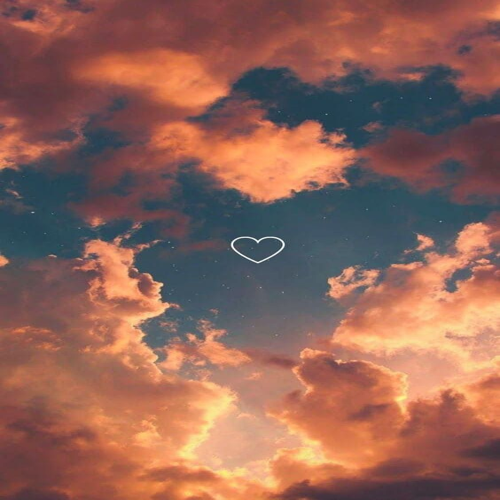

In [32]:
#LOAD IMAGE
image = Image.open(requests.get("https://i.pinimg.com/564x/4f/e7/ec/4fe7eca8ca21263ae92e830dfc81792b.jpg",stream = True).raw)
image_im = image.resize((500,500))
image_txt = image.resize((500,500))
image_im

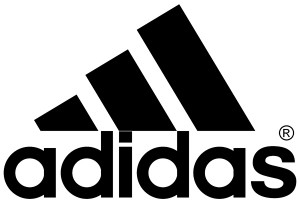

In [31]:
logo = Image.open(requests.get("https://www.companyfolders.com/blog/media/2015/01/adidas-300x207.jpg",stream = True).raw)
logo.resize((209,52))
logo

In [33]:
image_im = np.array(image_im.convert('RGB'))
h_image,w_image,_ = image_im.shape
logo = np.array(logo.convert('RGB'))
h_logo,w_logo,_ = logo.shape

In [34]:
center_y = int(h_image/2)
center_x = int(w_image/2)
top_y = center_y - int(h_logo/2)
bottom_y = top_y + h_logo
left_x = center_x - int(w_logo/2)
right_x = left_x + w_logo

In [38]:
roi = image_im[top_y:bottom_y,left_x:right_x]
result = cv2.addWeighted(roi,1,logo,1,0)
cv2.line(image_im,(0,center_y),(left_x,center_y),(0,0,255),1)
cv2.line(image_im,(right_x,center_y),(w_image,center_y),(0,0,255),1)
image_im[top_y:bottom_y,left_x:right_x] = result

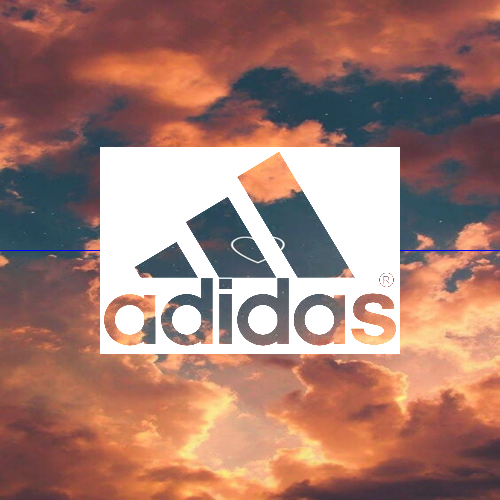

In [39]:
img = Image.fromarray(image_im,"RGB")
img

In [40]:
image_text = np.array(image_txt.convert("RGB"))
cv2.putText(image_text,text = "Adidas",org = (w_image-95,h_image-10),fontFace=cv2.FONT_HERSHEY_COMPLEX,fontScale=0.5,color = (0,0,255),thickness = 2,lineType = cv2.LINE_4)

array([[[132,  63,  66],
        [133,  67,  69],
        [134,  69,  73],
        ...,
        [187,  97,  78],
        [190,  99,  80],
        [191, 100,  81]],

       [[134,  70,  73],
        [135,  71,  75],
        [134,  73,  76],
        ...,
        [190, 100,  78],
        [193, 102,  80],
        [194, 103,  81]],

       [[133,  75,  77],
        [133,  75,  77],
        [131,  74,  77],
        ...,
        [197, 105,  80],
        [199, 106,  82],
        [200, 108,  82]],

       ...,

       [[ 95,  58,  56],
        [ 95,  58,  55],
        [ 96,  57,  56],
        ...,
        [117,  65,  62],
        [116,  65,  62],
        [116,  65,  62]],

       [[ 91,  59,  57],
        [ 91,  59,  57],
        [ 91,  57,  58],
        ...,
        [112,  61,  59],
        [112,  61,  59],
        [112,  61,  59]],

       [[ 87,  58,  56],
        [ 87,  58,  56],
        [ 88,  57,  58],
        ...,
        [110,  60,  59],
        [110,  60,  60],
        [110,  60,  60]]

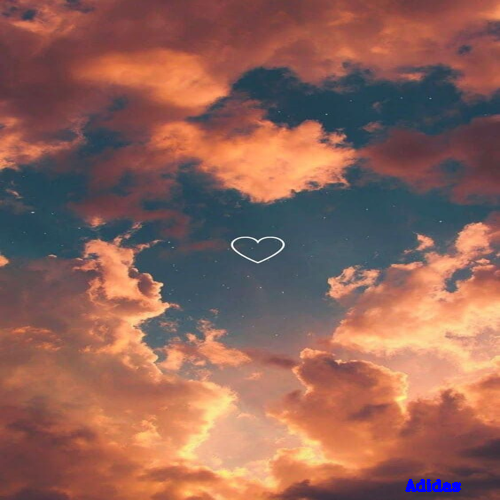

In [41]:
timg = Image.fromarray(image_text,"RGB")
timg